## Scripts for Creating the Mock Datasets

In [1]:
#importing necessary libraries

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime, timedelta
%matplotlib inline

#disabling warnings for cleaner presentation
import warnings
warnings.filterwarnings("ignore")

#importing dataframes with pre-established .csv formats
cus_df = pd.read_csv('mock_data/mock_client.csv',sep=';')
acc_df = pd.read_csv('mock_data/mock_account.csv',sep=';')
trans_df = pd.read_csv('mock_data/mock_trans.csv',sep=';')

### Functions for Creating Customer Data
Customer data is the most independant dataset, and contains little overlap with the others. To create the data, each of the fields are randomised from a procured list of options. Using the script, as many customers as desired can be created. After the customer data is built, the account data can be created, followed by the transaction data.

Currently, the data is not weighted towards a specific outcome, and generates random values. The outputs may not be considered fairly realistic, however serve as a good basis for our research.

### Customer Data

**client_id:**  The unique ID given to the customer.<br/>
**first_name:** The customer's first name. <br/>
**last_name:**  The customer's last name. <br/>
**dob:**        The customer's date of birth. <br/>
**join_date:**  The date the customer signed up to the bank. <br/>
**postcode:**   The customer's postcode (used for location identification). <br/>

In [2]:
def create_customer_data(cus_df,num_records):
    """
    This function generates a dataframe that contains a specified number of randomised customers.
    """
    
    i = 0
    
    while i < num_records:      
        #giving customers names
        cus_df.at[i,'first_name'] = choose_random(firstnames)
        cus_df.at[i,'last_name'] = choose_random(lastnames)
        
        #giving customers dates of birth
        cus_df.at[i,'dob'] = generate_datetime(1985,2001)
        
        #giving customers join date
        cus_df.at[i,'join_date'] = generate_datetime(2017,2019)
        #creating join date based off birthday
        #cus_df.at[i,'join_date'] = generate_datetime(cus_df.at[i,'dob'].year+18,2019)
        
        #giving customers postcodes
        cus_df.at[i,'postcode'] = choose_random(postcodes)
        
        #increment
        i+=1
        
    #sorting by date
    cus_df = cus_df.sort_values(by=['join_date'])
    
    #resetting index
    cus_df = cus_df.reset_index(drop=True)
    
    #loop to give ids in chronological order
    i = 0
    while i < cus_df.shape[0]:
        cus_df.at[i,'client_id'] = i+1
        i+=1
    
    #making account ID the index of the dataframe
    cus_df = cus_df.set_index("client_id", drop = True)
        
    return cus_df

### Account Data

**account_id:** Unique identifier for the account.<br/>
**client_id:** The customer to whom the accont belongs.<br/>
**account_name:** What the account is named (used for categorising purpose of account).<br/>
**date_created:** The date the account was created.<br/>
**balance:** The current balance of the account.<br/>

In [3]:
def create_account_data(acc_df,cus_df,num_records):
    """
    This function generates a dataframe that contains a specified number of randomised accounts based on
    a dataframe of customers.
    """
    
    i = 0
    
    while i < num_records:
        #assigning customer IDs to an account
        acc_df.at[i,'client_id'] = choose_random(cus_df.index.tolist())
        
        #giving account a name
        #TODO
        
        #giving account date of creation based on birth date of customer
        acc_df.at[i,'date_created'] = generate_datetime(cus_df.at[acc_df.at[i,'client_id'],'join_date'].year,2019)
        
        #giving account a balance
        acc_df.at[i,'balance'] = round(random.uniform(100,10000),2)
        
        i+=1
    
    
    #sorting by date
    acc_df = acc_df.sort_values(by=['date_created'])
    
    #resetting index
    acc_df = acc_df.reset_index(drop=True)
    
    #loop to give ids in chronological order
    i = 0
    while i < acc_df.shape[0]:
        acc_df.at[i,'account_id'] = i+1
        i+=1
    
    #making account ID the index of the dataframe
    acc_df = acc_df.set_index("account_id", drop = True)
    
    return acc_df

### Transaction Data
**trans_id:** The unique ID given to every new transaction.<br/>
**account_id:** The account ID of the person making the transaction.<br/>
**date:** The date the transaction occured.<br/>
**type:** The nature of the transaction.<br/>
**operation:** Whether the funds are ingoing or outgoing.<br/>
**amount:** The amount of money involved in the transaction.<br/>
**new_balance:** The balance after the transaction.<br/>
**account_to_or_from:** The account ID of the other party involved in the transaction (for transfers).<br/>

In [4]:
def create_transaction_data(trans_df,cus_df,acc_df,num_records):
    """
    This function generates a dataframe that contains a specified number of randomised transactions based on
    a dataframe of customers and accounts.
    """
    
    i = 0
    
    while i < num_records:
        #giving transaction an account number
        trans_df.at[i,'account_id'] = int(choose_random(acc_df.index.tolist()))
        
        #giving transaction a date
        trans_df.at[i,'date'] = generate_datetime(acc_df.at[int(trans_df.at[i,'account_id']),'date_created'].year,2019)
        
        #giving type of transaction
        trans_df.at[i,'type'] = choose_random(typelist)
        
        #giving operation of transaction
        if trans_df.at[i,'type'] == 'Income' or trans_df.at[i,'type'] == 'Transfer to Account':
            trans_df.at[i,'operation'] = 'ingoing'
        else:
            trans_df.at[i,'operation'] = 'outgoing'
        
        #giving transaction amount
        trans_df.at[i,'amount'] = round(random.uniform(1,100),2)
        
        #giving initial balance amount
        trans_df.at[i,'new_balance'] = acc_df.at[int(trans_df.at[i,'account_id']),'balance']
        
        i+=1
    
    #sorting by date
    trans_df = trans_df.sort_values(by=['date'])
    
    #resetting index
    trans_df = trans_df.reset_index(drop=True)
    
    #loop to give ids in chronological order
    i = 0
    while i < trans_df.shape[0]:
        trans_df.at[i,'trans_id'] = i+1
        #updating balance to reflect transaction
        if trans_df.at[i,'operation'] == 'ingoing':
            acc_df.at[int(trans_df.at[i,'account_id']),'balance'] = (acc_df.at[int(trans_df.at[i,'account_id']),'balance']  
                                                                     + trans_df.at[i,'amount'])
        else:
            acc_df.at[int(trans_df.at[i,'account_id']),'balance'] = (acc_df.at[int(trans_df.at[i,'account_id']),'balance']  
                                                                     - trans_df.at[i,'amount'])
            
        trans_df.at[i,'new_balance'] = acc_df.at[int(trans_df.at[i,'account_id']),'balance']
        
        i+=1
    
    #making transaction ID the index of the dataframe
    trans_df = trans_df.set_index("trans_id", drop = True)
    
    return trans_df

### Additional Functions and Declarations For Creating the Datasets

In [5]:
#declaring some lists to choose items from in the function calls above
#can be replaced with more comprehensive lists kept in files
firstnames = ['Alex','Barney','Charles','Dane','Ernie','Frank','Gerry','Harry','Indigo','Jack','Katie','Lucy','Marty','Nick',
             'Oliver','Peter','Queen','Ray','Sam','Tim','Ulena','Veronica','Wendy','Xavier','Yana','Zeke']
lastnames = ['Alpha','Bravo','Charlie','Delta','Echo','Foxtrot','Golf','Hotel','India','Juliet','Kilo','Lima','Mike','November'
            ,'Oscar','Papa','Quebec','Romeo','Sierra','Tango','Uniform','Victor','Whiskey','X-Ray','Yankee','Zulu']
postcodes = [2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400]
typelist = ['Fuel','Groceries','Food','Entertainment','Shopping','Health','Uncategorised','Income',
            'Transfer to Account','Transfer from Account']
typelistSpending = ['Fuel','Groceries','Food','Entertainment','Shopping','Health','Uncategorised']

In [6]:
def choose_random(arr):
    """
    This function chooses a random index of an array
    """
    return arr[random.randint(0,len(arr)-1)]

def generate_datetime(min_year, max_year):
    """
    Generates a random time between two years
    Format: yyyy-mm-dd hh:mm:ss.000000
    """
    start = datetime(min_year, 1, 1, 00, 00, 00)
    years = max_year - min_year + 1
    end = start + timedelta(days=365 * years)
    return (start + (end - start) * random.random()).date()

### Data Generation For Testing Purposes

In [7]:
cus_df_temp = create_customer_data(cus_df,130)

In [8]:
acc_df_temp = create_account_data(acc_df,cus_df_temp,200)

In [9]:
trans_df_temp = create_transaction_data(trans_df,cus_df_temp,acc_df_temp,20000)

### Functions To Test and Explore Data

In [29]:
def return_account_trans(val,trans_df,start_date,end_date):
    """
    This function returns all the transactions an account has made in a certain timeframe.
    Note: time range is optional. If not desired, call start_date as 0 and end_date as 0
    """
    df = trans_df[trans_df.account_id == val]
    if (start_date != 0) and (end_date != 0):
        df['date'] = pd.to_datetime(df['date'])
        mask = (df['date'] > start_date) & (df['date'] <= end_date)
        df = df.loc[mask]
        
    return df

def return_category_expen(cat,acc_trans,start_date,end_date):
    """
    This function returns the amount spent in a category by an account in a certain timeframe
    Note: time range is optional. If not desired, call start_date as 0 and end_date as 0
    """
    df = acc_trans[acc_trans.type == cat]
    if (start_date != 0) and (end_date != 0):
        df['date'] = pd.to_datetime(df['date'])
        mask = (df['date'] > start_date) & (df['date'] <= end_date)
        df = df.loc[mask]
        
    total = df['amount'].sum() 
    
    return round(total,2) 

def create_dataframe_spending(acc_trans,start_date,end_date):
    """
    This function creates a new dataframe that displays spending within the typelistSpending categories, accepts time ranges
    Note: time range is optional. If not desired, call start_date as 0 and end_date as 0
    """
    df = pd.DataFrame(columns=typelistSpending)
    for i in typelistSpending:
        df.at[0,i] = return_category_expen(i,acc_trans,start_date,end_date)
        
    return df

def calculate_average_spending(trans_df,start_date,end_date):
    """
    This function calculates the average spending in each of the typelistSpending categories based, accepts time ranges.
    Note: time range is optional. If not desired, call start_date as 0 and end_date as 0
    """
    tdf_list = trans_df.groupby('account_id')['account_id'].nunique()
    tdf = pd.DataFrame(columns=typelistSpending)
    for i, row in tdf_list.iteritems():
        tdf = tdf.append(create_dataframe_spending(return_account_trans(i,trans_df,start_date,end_date),0,0))
    
    df = pd.DataFrame(columns=typelistSpending)
    for i in typelistSpending:
        df.at[0,i] = round(tdf[i].sum()/tdf.shape[0],2)

    return df        


In [11]:
#test script: what was the expenditure for account 21 in January of 2018?
print(return_account_trans(21,trans_df_temp,datetime(2018, 1, 1),datetime(2018, 1, 31)))

         account_id       date           type operation amount new_balance  \
trans_id                                                                     
1000             21 2018-01-14  Uncategorised  outgoing  28.31     6977.37   
1151             21 2018-01-30       Shopping  outgoing   3.89     6973.48   

         account_to_or_from  
trans_id                     
1000                    NaN  
1151                    NaN  


In [12]:
#test script: how much did account 10 spend on fuel between 1st of January and 1st of July in 2018?
temp_df = return_account_trans(10,trans_df_temp,0,0)
print('$',return_category_expen('Fuel',temp_df,datetime(2018, 1, 1),datetime(2018, 7, 1)))

$ 0


In [13]:
#est script: how much has account 5 spent in each area in the history of their account?
temp_df = return_account_trans(5,trans_df_temp,0,0)
print(create_dataframe_spending(temp_df,0,0))

     Fuel Groceries    Food Entertainment Shopping  Health Uncategorised
0  581.33     347.8  282.11        422.04   350.36  430.81        356.59


In [31]:
#test script: the average spending of all combined accounts
print(calculate_average_spending(trans_df_temp,0,0))

     Fuel Groceries    Food Entertainment Shopping  Health Uncategorised
0  510.73    492.08  504.43        493.74   497.06  482.27        529.35


### Charts for Exploring Data

In [15]:
def balance_time_series(df):
    """
    This function displays a simple time series plot of a customer's balance over time.
    Can be combined with other functions (such as return_account_trans) to restrict dates.
    Modular function which can accept any variation on the trans_df dataframe.
    """
    df.plot(x='date',y='new_balance')
      
def radar_chart_categories(df):
    """
    This function displays a radar chart based on the df created from create_dataframe_spending()
    A radar chart will show the distribution of spending in each of the spending categories
    """
    labels = np.array(typelistSpending)
    vals = df.loc[0,labels].values
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    vals = np.concatenate((vals,[vals[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    
    #making the figure
    fig = plt.figure(figsize=[6,6], dpi=150)
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, vals, 'o-', linewidth=2)
    ax.fill(angles, vals, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title("Spending")
    ax.grid(True)

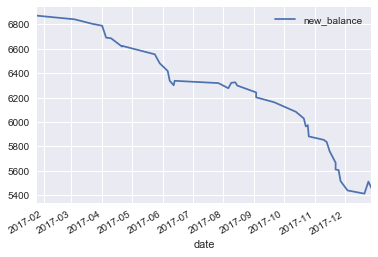

In [16]:
#test script: the balance of account 1 from 2017 to 2018
balance_time_series(return_account_trans(1,trans_df_temp,datetime(2017, 1, 1),datetime(2017, 12, 31)))

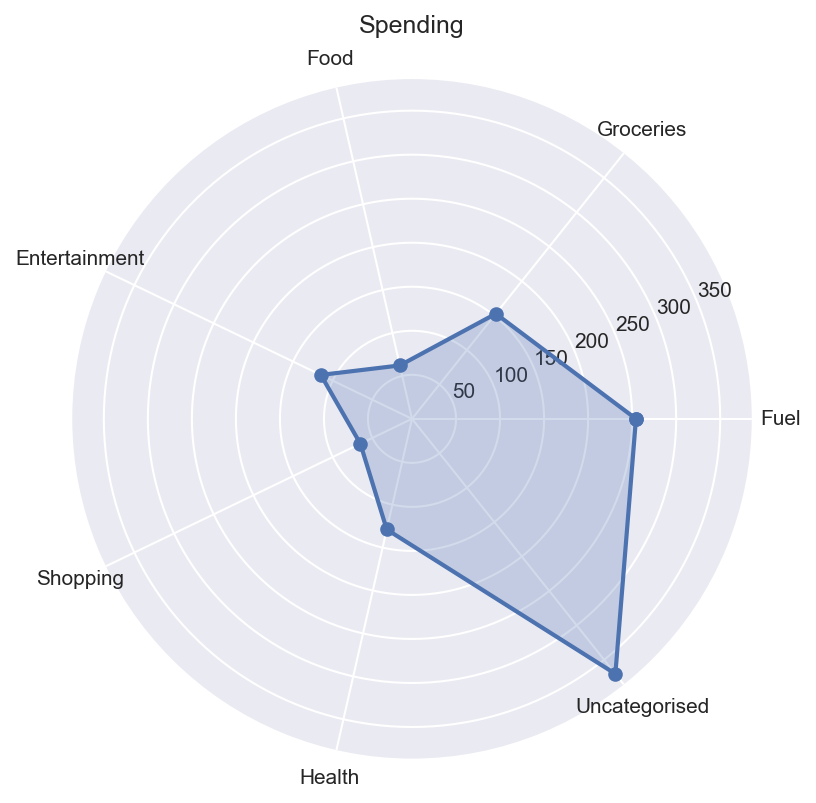

In [17]:
#test script: radar chart of account 20 spending in 2018
temp_df = return_account_trans(20,trans_df_temp,datetime(2018, 1, 1),datetime(2018, 12, 31))
radar_chart_categories(create_dataframe_spending(temp_df,0,0))

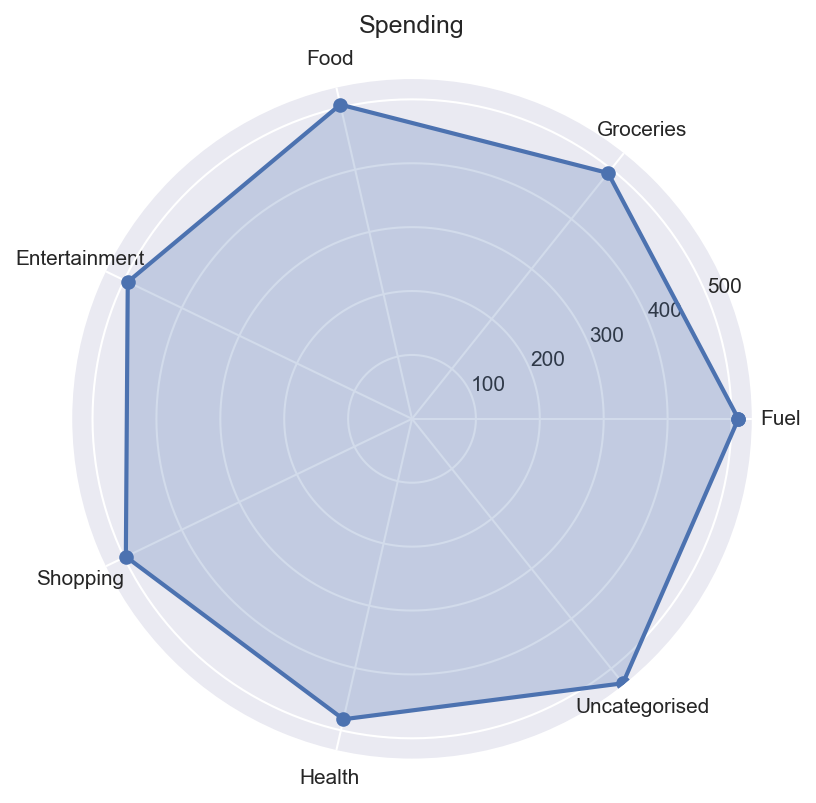

In [30]:
#test script: radar chart of average spending in all accounts
radar_chart_categories(calculate_average_spending(trans_df_temp,0,0))